 Created by : Rupanshu Yadav 
              2019475

In [1]:
import pandas as pd
import numpy as np
import seaborn as seabornInstance
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

In [2]:
# read dataset 
dataset = pd.read_csv('Data.csv')

In [3]:
# check full null values and not integer values 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Gender                 3998 non-null   object 
 2   DOB                    3998 non-null   object 
 3   10percentage           3998 non-null   float64
 4   10board                3998 non-null   object 
 5   12graduation           3998 non-null   int64  
 6   12percentage           3998 non-null   float64
 7   12board                3998 non-null   object 
 8   CollegeID              3998 non-null   int64  
 9   CollegeTier            3998 non-null   int64  
 10  Degree                 3998 non-null   object 
 11  Specialization         3998 non-null   object 
 12  collegeGPA             3998 non-null   float64
 13  CollegeCityID          3998 non-null   int64  
 14  CollegeCityTier        3998 non-null   int64  
 15  Coll

In [4]:
# drop ID column
dataset.drop('ID', axis = 1)

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,High-Salary
0,f,1990-02-19 00:00:00,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,...,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,1
1,m,1989-10-04 00:00:00,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,...,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,1
2,f,1992-08-03 00:00:00,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,...,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,1
3,m,1989-12-05 00:00:00,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,...,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,1
4,m,1991-02-27 00:00:00,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,...,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,m,1987-04-15 00:00:00,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,...,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,0
3994,f,1992-08-27 00:00:00,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,...,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,0
3995,m,1991-07-03 00:00:00,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,...,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,1
3996,f,1992-03-20 00:00:00,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,...,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,0


In [5]:
dataset['Gender'] = dataset['Gender'].map(dict(m=1, f=0))

In [6]:
# convert all object data type to int64
label1 = LabelEncoder()
for (columnName, columnData) in dataset.iteritems():
    if dataset[columnName].dtype == object:
        dataset[columnName] = label1.fit_transform(dataset[columnName])

In [7]:
# check if worked
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Gender                 3998 non-null   int64  
 2   DOB                    3998 non-null   int64  
 3   10percentage           3998 non-null   float64
 4   10board                3998 non-null   int64  
 5   12graduation           3998 non-null   int64  
 6   12percentage           3998 non-null   float64
 7   12board                3998 non-null   int64  
 8   CollegeID              3998 non-null   int64  
 9   CollegeTier            3998 non-null   int64  
 10  Degree                 3998 non-null   int64  
 11  Specialization         3998 non-null   int64  
 12  collegeGPA             3998 non-null   float64
 13  CollegeCityID          3998 non-null   int64  
 14  CollegeCityTier        3998 non-null   int64  
 15  Coll

In [8]:
# check min and value of each column
dataset.describe()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,High-Salary
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,0.760630,1010.416458,77.925443,127.426463,2008.087544,74.466366,159.780890,5156.851426,1.925713,...,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110,0.534017
std,3.632182e+05,0.426752,474.737257,9.850162,85.632059,1.653599,10.999933,109.006566,4802.261482,0.262270,...,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075,0.498904
min,1.124400e+04,0.000000,0.000000,43.000000,0.000000,1995.000000,40.000000,0.000000,2.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700,0.000000
25%,3.342842e+05,1.000000,645.250000,71.680000,60.000000,2007.000000,66.000000,77.000000,494.000000,2.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200,0.000000
50%,6.396000e+05,1.000000,1048.500000,79.150000,96.000000,2008.000000,74.400000,102.500000,3879.000000,2.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300,1.000000
75%,9.904800e+05,1.000000,1393.750000,85.670000,224.000000,2009.000000,82.600000,284.000000,8818.000000,2.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,1.000000
max,1.298275e+06,1.000000,1871.000000,97.760000,274.000000,2013.000000,98.700000,339.000000,18409.000000,2.000000,...,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400,1.000000


In [9]:
# replace all the -1s with zeros
for (columnName, columnData) in dataset.iteritems():
        if dataset[columnName].min() == -1 and columnName != 'Domain':
            dataset[columnName].replace([-1], [0], inplace=True)

In [10]:
dataset.head(10)

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,High-Salary
0,203097,0,715,84.30,43,2007,95.8,47,1141,2,...,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,1
1,579905,1,612,85.40,60,2007,85.0,77,5807,2,...,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,1
2,810601,0,1521,85.00,60,2010,68.2,77,64,2,...,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,1
3,267447,1,660,85.60,60,2007,83.6,77,6920,1,...,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,1
4,343523,1,1040,78.00,60,2008,76.8,77,11368,2,...,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0
5,1027655,1,1491,89.92,224,2010,87.0,284,5086,2,...,0,0,0,0,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,1
6,947847,1,1680,86.08,224,2010,67.5,284,314,2,...,0,0,0,0,1.7081,-0.1054,-1.0379,-2.00920,-1.0872,1
7,912934,1,1458,92.00,60,2010,91.0,77,1757,1,...,469,0,0,0,-0.0154,1.2114,0.0100,0.14590,1.2470,1
8,552574,1,1230,90.00,60,2009,91.2,77,13,1,...,0,0,0,0,-0.1590,0.5454,-0.6048,-0.74150,-0.2859,1
9,1203363,1,1765,77.00,60,2010,72.2,77,8640,2,...,0,0,0,0,-1.3080,0.5454,-0.9122,0.90660,0.0973,0


In [11]:
dataset['10board'].value_counts()

60     1395
224    1164
0       350
96      281
214     122
       ... 
43        1
41        1
39        1
37        1
274       1
Name: 10board, Length: 275, dtype: int64

In [12]:
# group all the values with count <= 1
s = dataset['10board'].value_counts()
dataset['10board'] = np.where(dataset['10board'].isin(s.index[s > 1]), dataset['10board'], 0)

In [13]:
# divde result column from others 
X = dataset.drop('High-Salary', axis=1)
y = dataset['High-Salary']

In [14]:
# split into data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.6105, random_state=43)

In [15]:
# perform Scaling of data
sc = StandardScaler();
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# perform Recursive Feature Elimination

from sklearn.feature_selection import RFE
logreg = LogisticRegression()

# number of columns selected is set to 20
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())

# cols is true if column should be selected 
print(rfe.support_)
cols = list((rfe.support_))

col = []
before = []
for (columnName, columnData) in dataset.iteritems():
    before.append(columnName)

# generate a list of name of columns with true values in them
for i in range(len(cols)):
    if (cols[i]):
        col.append(before[i])

[ True  True False  True  True False  True False False  True  True False
  True False False  True  True  True  True  True False  True False  True
 False False False  True  True False  True  True  True]


In [17]:
# print the list of final column to regressed 
print(col)

['ID', 'Gender', '10percentage', '10board', '12percentage', 'CollegeTier', 'Degree', 'collegeGPA', 'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant', 'ComputerProgramming', 'ComputerScience', 'CivilEngg', 'conscientiousness', 'extraversion', 'nueroticism', 'openess_to_experience']


In [18]:
# modify the dataset according to choosen values 

X = dataset.drop('High-Salary', axis=1)
X = X[col]
y = dataset['High-Salary']

In [19]:
# spilt that data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.325, random_state=43)

# perform Scaling of Data
sc = StandardScaler();
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# create the regression model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
# print the accuracy of the model
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.7331


In [21]:
# print confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[437, 182],
       [165, 516]])

In [22]:
# print classwise accuracys
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       619
           1       0.74      0.76      0.75       681

    accuracy                           0.73      1300
   macro avg       0.73      0.73      0.73      1300
weighted avg       0.73      0.73      0.73      1300



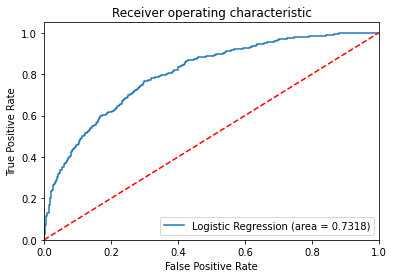

In [23]:
# print the ROC curve of the model 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()